<font color="#CC3D3D"><p>
# Exercise: Clustering with Pycaret

### 0. Problem Statement and Dataset
- 여행사에서 데이터 분석을 담당하는 ABM은 고객의 여행지 선호도 설문 조사 결과를 이용하여 선호도를 기준으로 고객들을 군집화하고자 한다.
- 해당 데이터는 고객 별 항목의 선호도에 따라 여행지 선택 시 중요하게 생각하는 항목의 점수를 1 ~ 5 점까지 기입한 데이터이다.

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import matplotlib.pylab as plt 
from matplotlib import font_manager, rc 
import seaborn as sns 
%matplotlib inline
import platform

### 1. Read Data

In [2]:
features = pd.read_csv('./data/travel_survey.csv', encoding='cp949')
features

,ID,지명도,볼거리,가격,거리,숙소,쇼핑,음식,교통,휴식
0,#0001,2,2,1,2,5,3,2,1,5
1,#0002,4,2,5,2,2,1,5,3,2
2,#0003,3,1,4,3,2,3,3,5,1
3,#0004,3,1,4,2,2,3,3,5,3
4,#0005,5,5,2,2,3,3,3,2,3
...,...,...,...,...,...,...,...,...,...,...
501,#0502,1,3,4,3,1,1,2,5,1
502,#0503,4,4,2,3,3,3,1,2,2
503,#0504,2,1,1,3,4,1,2,3,4
504,#0505,5,2,5,2,3,1,4,2,1


### 2. Set up Environment (Data Preprocessing & Feature Engineering)

In [3]:
from pycaret.clustering import *

exp02 = setup(
    features, session_id=123,
    ignore_features=['ID'],
    numeric_features=features.iloc[:,1:].columns.to_list(),
    normalize=True, 
)

,Description,Value
0,session_id,123
1,Original Data,"(506, 10)"
2,Missing Values,False
3,Numeric Features,9
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(506, 9)"
9,CPU Jobs,-1


### 3. Create Model 

In [4]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


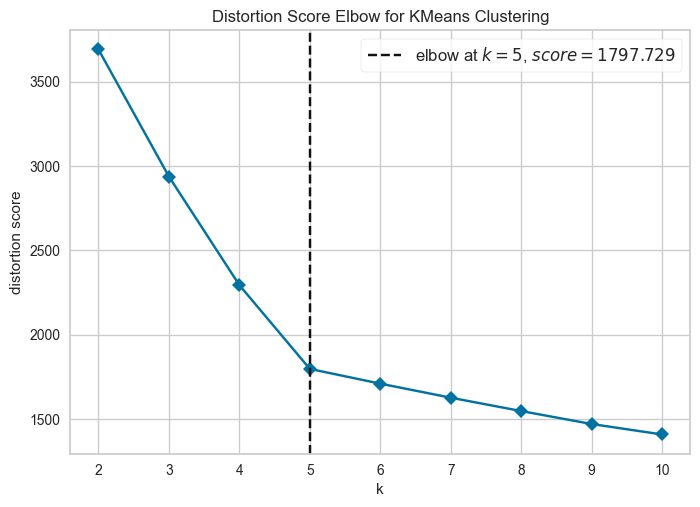

In [5]:
# Select the best K 
kmeans = create_model('kmeans')
plot_model(kmeans, plot='elbow')

In [6]:
kmeans = create_model('kmeans', num_clusters=5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.346,192.0328,1.1183,0,0,0


### 4. Assign Model 

In [7]:
kmean_results = assign_model(kmeans)
kmean_results

,ID,지명도,볼거리,가격,거리,숙소,쇼핑,음식,교통,휴식,Cluster
0,#0001,2,2,1,2,5,3,2,1,5,Cluster 4
1,#0002,4,2,5,2,2,1,5,3,2,Cluster 3
2,#0003,3,1,4,3,2,3,3,5,1,Cluster 1
3,#0004,3,1,4,2,2,3,3,5,3,Cluster 1
4,#0005,5,5,2,2,3,3,3,2,3,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...
501,#0502,1,3,4,3,1,1,2,5,1,Cluster 1
502,#0503,4,4,2,3,3,3,1,2,2,Cluster 0
503,#0504,2,1,1,3,4,1,2,3,4,Cluster 4
504,#0505,5,2,5,2,3,1,4,2,1,Cluster 3


### 5. Evaluate Model

In [8]:
plot_model(kmeans)

In [9]:
# show the size of each cluster
plot_model(kmeans, plot='distribution')

In [11]:
import platform

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
rc('axes', unicode_minus=False)   

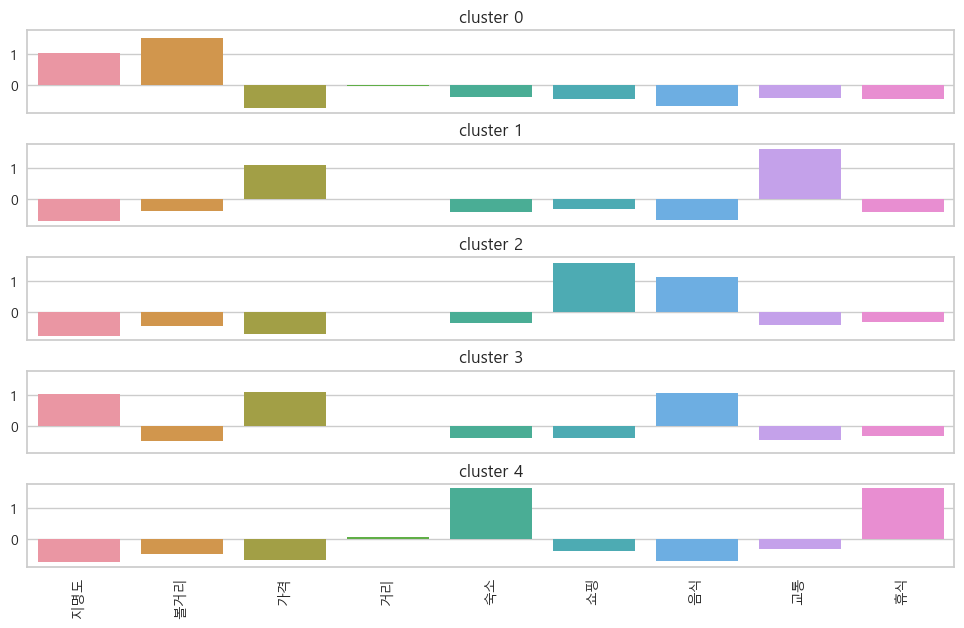

In [18]:
fig, ax = plt.subplots(kmeans.n_clusters, 1, figsize=(10,6), sharex=True, sharey=True)
ax = ax.ravel()
plt.tight_layout() # 자동으로 레이아웃 조정

for i in range(kmeans.n_clusters):
    ax[i].set_title('cluster %d' % i)
    sns.barplot(x=np.arange(kmeans.cluster_centers_[i].size), y=kmeans.cluster_centers_[i], ax=ax[i])
    ax[i].set_xticks(np.arange(kmeans.cluster_centers_[i].size))
    ax[i].set_xticklabels(features.iloc[:,1:].columns, rotation=90)